In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

plt.xkcd()

import scipy.spatial.distance as spt

In [0]:
G = nx.karate_club_graph()

### Structral Equivalence

structral equivalence is a strict definition, requires all neighbors to be equivalent.

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


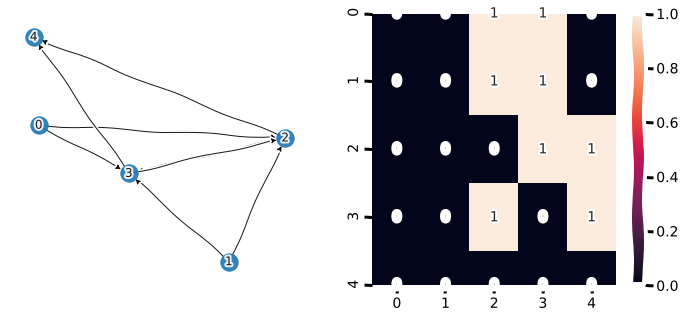

In [0]:
A = np.array([
    [0,0,1,1,0],
    [0,0,1,1,0],
    [0,0,0,1,1],
    [0,0,1,0,1],
    [0,0,0,0,0]
])
G = nx.DiGraph(A)
pos = nx.spring_layout(G)

figsize(12,5)
plt.subplot(1,2,1)
nx.draw(G,pos = pos,with_labels = True,alpha = .9)

plt.subplot(1,2,2)
sns.heatmap(A,annot = True)
plt.show()

### Reduce the strict definition to similarity, which calculates distances in different metrics

In [0]:
def plot_pdist(G):
    A = nx.to_numpy_array(G)
    cosine = spt.pdist(A,metric = 'cosine')
    jaccard = spt.pdist(A,metric = 'jaccard')
    pearson = spt.pdist(A,metric = 'correlation')
    euclidean = spt.pdist(A,metric = 'euclidean')

    figsize(25,12)

    plt.subplot(2,3,1)
    sns.heatmap(A)
    plt.title("Adjacency Matrix")

    plt.subplot(2,3,2)
    sns.heatmap(spt.squareform(cosine))
    plt.title("Cosine Distance")

    plt.subplot(2,3,3)
    sns.heatmap(spt.squareform(jaccard))
    plt.title('Jaccard Distance')

    plt.subplot(2,3,4)
    sns.heatmap(spt.squareform(pearson))
    plt.title('Pearson Distance')

    plt.subplot(2,3,5)
    sns.heatmap(spt.squareform(euclidean))
    plt.title('Euclidean Distance')

    plt.show()

In [0]:
G = nx.karate_club_graph()

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


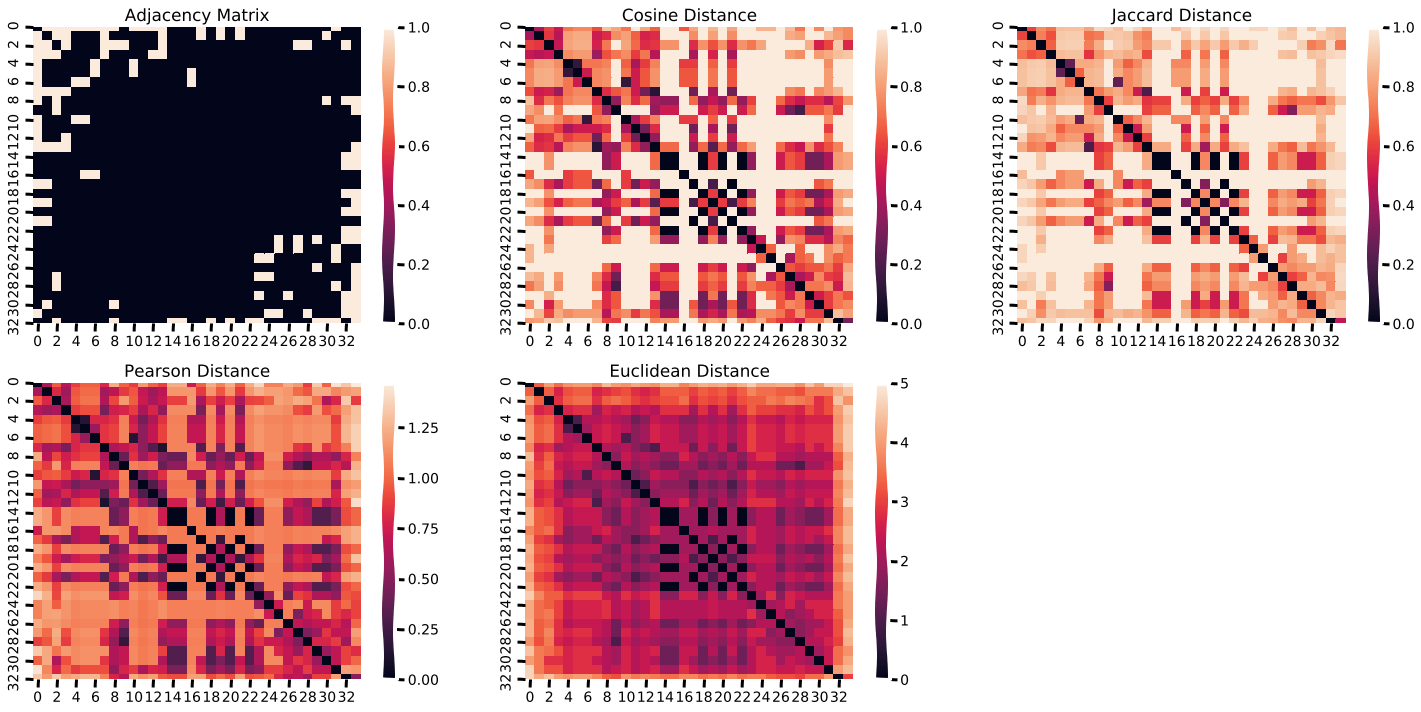

In [0]:
plot_pdist(G)

In [0]:
!wget http://www-personal.umich.edu/~mejn/netdata/lesmis.zip
import zipfile
# unzipping cats and dogs dataset
data_path = 'lesmis.zip'
zip_object = zipfile.ZipFile(data_path,mode = 'r')
zip_object.extractall('./')
zip_object.close()

--2019-11-12 01:20:50--  http://www-personal.umich.edu/~mejn/netdata/lesmis.zip
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2517 (2.5K) [application/zip]
Saving to: ‘lesmis.zip’

lesmis.zip          100%[===================>]   2.46K  --.-KB/s    in 0s      

2019-11-12 01:20:50 (350 MB/s) - ‘lesmis.zip’ saved [2517/2517]



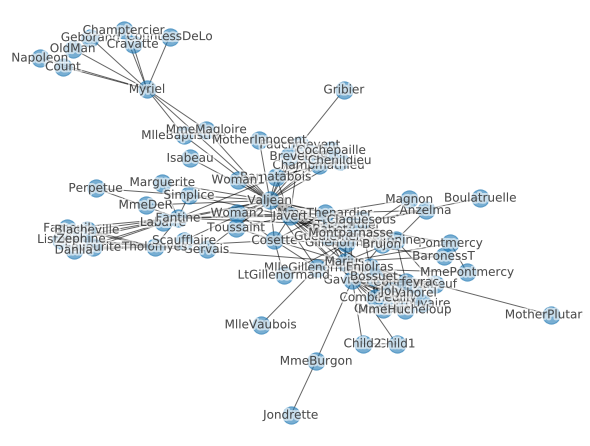

In [0]:
G = nx.read_gml('lesmis.gml')
figsize(8,6)
nx.draw(G,alpha = 0.6,with_labels = True)
plt.show()

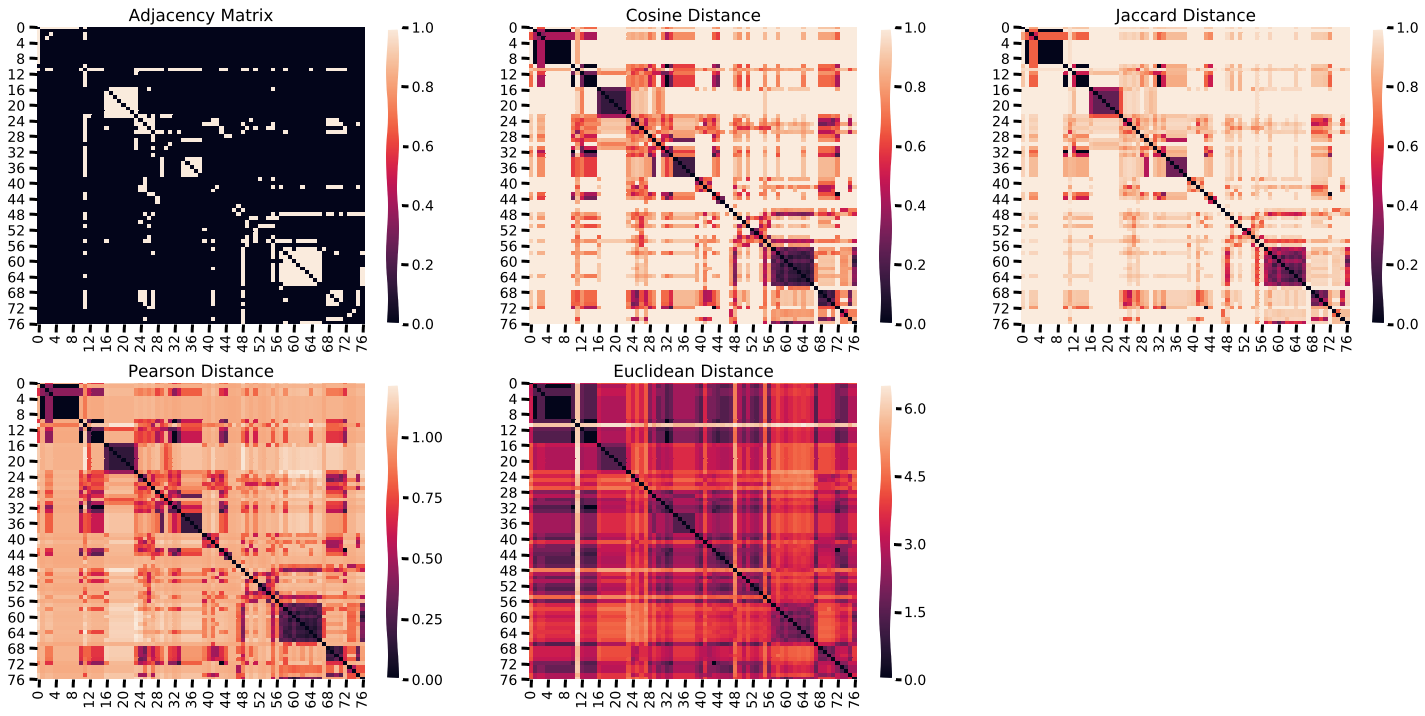

In [0]:
plot_pdist(G)

When using cosine similarity, there can be some weights, not necessary just binary matrix.

### Three versions of regular equivalence

In [0]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [0]:
def regular_equivalence(G,alpha = .3, iterations = 20):
    '''
        Regular equivalence loop version
    '''

    # initialization similarity matrix and adjacency matrix
    sigma_ij = np.random.random((len(G),len(G)))
    A = nx.to_numpy_array(G)

    # Iterate
    for _ in range(iterations):

        # calculate similarity for every vertex paris
        for i in range(len(G)):
            for j in range(len(G)):

                sim = 0
                # loop through neighbors
                for k in range(len(G)):
                    for l in range(len(G)):
                        sim += A[i,k] * A[j,l] * sigma_ij[k,l]

                # has high score for node itself
                if i == j:
                    sim += 1

                sigma_ij[i,j] =alpha * sim

    return sigma_ij


def clustering(sim_mat,plot = False,max_clust = 4):
    Z = linkage(sim_mat,method = 'complete',metric = 'cosine')

    if plot:
        figsize(8,6)
        dendrogram(Z)
        plt.show()
    
    return fcluster(Z,max_clust,criterion='maxclust')

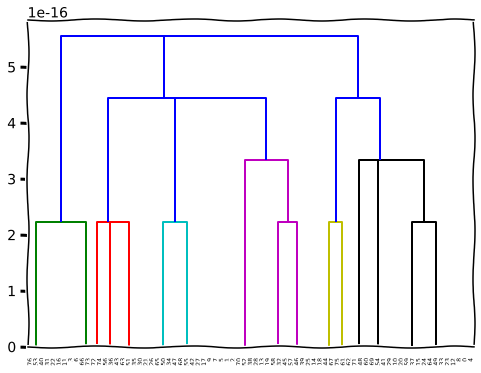

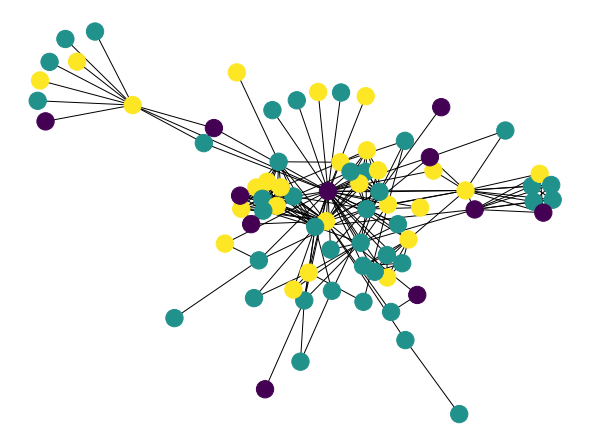

In [0]:
sim_mat = regular_equivalence(G,0.3,10)
clusters = clustering(sim_mat,plot= True)
nx.draw(G,node_color = clusters)
plt.show()

In [0]:
def regular_equivalence_v2(G,alpha = .5, iterations = 20,tol = 1e-2):

    '''
        Vectorized version of regula equivalence
    '''

    # initialization similarity matrix and adjacency matrix
    sigma_ij = np.random.random((len(G),len(G)))
    A = nx.to_numpy_array(G)
    eye = np.eye(len(G))

    for it in range(iterations):
        sigma_prev = sigma_ij.copy()
        sigma_ij = alpha * np.dot(np.dot(A,sigma_ij),A) + eye

        if np.allclose(sigma_ij,sigma_prev,atol = tol):
            break
    print("Taking {} iterations.".format(it))

    return sigma_ij


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


Taking 19 iterations.


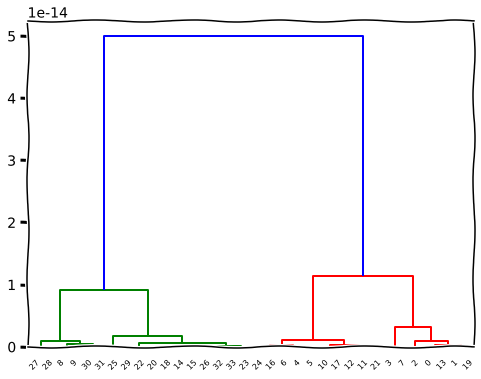

In [0]:
G = nx.karate_club_graph()
sim_mat = regular_equivalence_v2(G,0.8,iterations = 20)
clusters = clustering(sim_mat,plot= True,max_clust = 5)

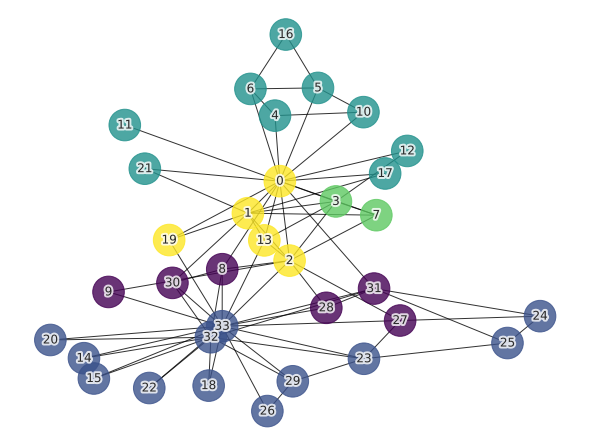

In [0]:
figsize(8,6)
pos = nx.spring_layout(G)
nx.draw(G,node_color = clusters,with_labels = True,node_size = 1000,alpha = .8,pos = pos)
plt.show()

In [0]:
G = nx.read_gml('lesmis.gml')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


Taking 9 iterations.


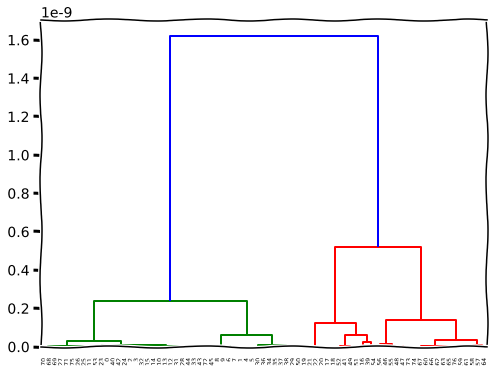

In [0]:
sim_mat = regular_equivalence_v2(G,0.1,iterations = 10)
clusters = clustering(sim_mat,plot= True,max_clust = 5)

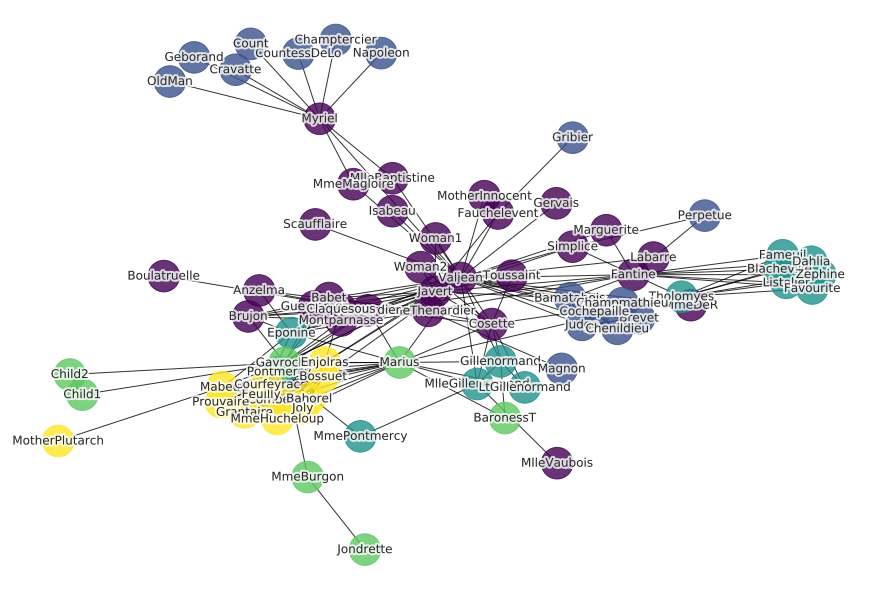

In [0]:
figsize(12,8)
pos = nx.spring_layout(G)
nx.draw(G,node_color = clusters,with_labels = True,node_size = 1000,alpha = .8,pos = pos)
plt.show()

In [0]:
def regular_equivalence_v3(G,alpha = .3, iterations = 20):

    '''
        Vectorized version of regula equivalence
    '''

    # initialization similarity matrix and adjacency matrix
    sigma_ij = np.random.random((len(G),len(G)))
    A = nx.to_numpy_array(G)
    eye = np.eye(len(G))

    for it in range(iterations):
        sigma_prev = sigma_ij.copy()
        sigma_ij = alpha * np.dot(A,sigma_ij) + eye
        if np.allclose(sigma_ij,sigma_prev,atol = 1e-5):
            break

    print("Taking {} itterations.".format(it))


    return sigma_ij

Taking 9 itterations.


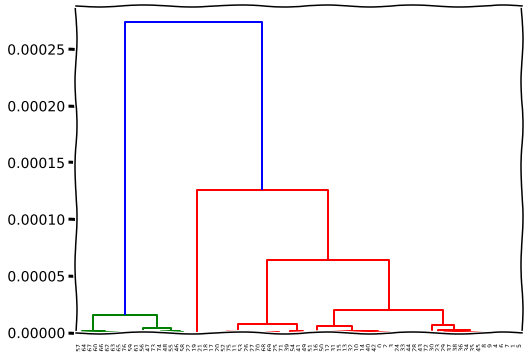

In [0]:
sim_mat = regular_equivalence_v3(G,.5,iterations = 10)
clusters = clustering(sim_mat,plot= True,max_clust = 7)

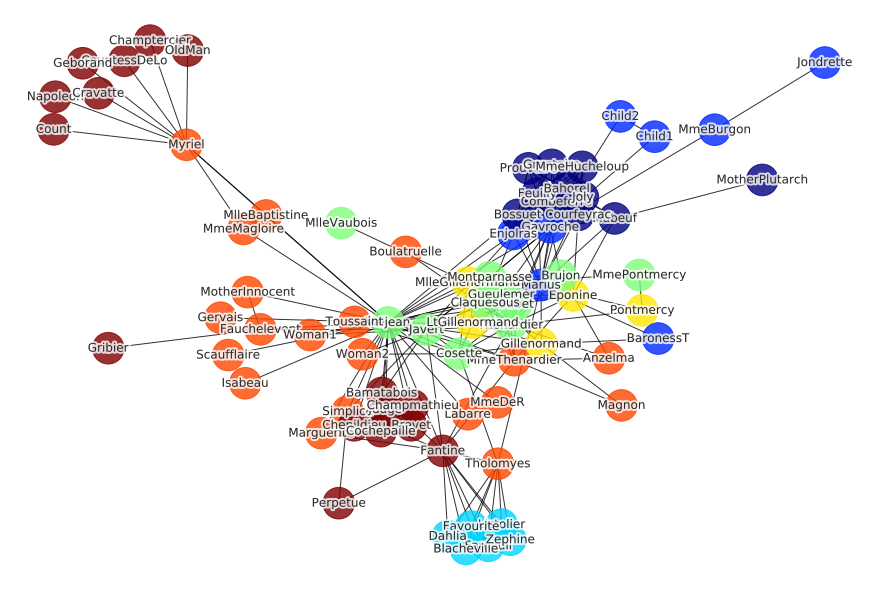

In [0]:
figsize(12,8)
pos = nx.spring_layout(G)
nx.draw(G,node_color = clusters,with_labels = True,node_size = 1000,alpha = .8,pos = pos,cmap = plt.get_cmap('jet'))
plt.show()

### Simrank

In [0]:
from tqdm import tqdm_notebook
import tqdm

In [0]:
def simrank(G,C = .5, iterations = 100,source = None,target = None):

    '''
        Calculate simrank matrix
        Parameters:
        --------
            G: networkx graph object
            C: constant value specified in simrank paper
            iterations: maximum iterations to take
            source: the source node to retrieve results, int value
            target: the target node to retrieve results, int valuee

        Returns:
        --------
            if source is None and target is None - simrank matrix S - numpy 2D array
            if source is not None and target not None - S[source, target]
            if source is not None and target is None - S[source]
    '''

    A = nx.to_numpy_matrix(G)
    A = A / A.sum(axis = 0)
    S = np.random.random((len(G),len(G)))

    for it in range(iterations):
        prev_S = S.copy()
        np.fill_diagonal(S, 1.0)
        S = C * np.dot(np.dot(A.T,S),A)

        if np.allclose(S,prev_S,atol = 1e-7):
            break
    
    print("Taking {} iterations.".format(it))
    if source is not None and target is not None:
        return S[source,target]
    if source is not None:
        return S[source]
    return S

In [0]:
S = simrank(G)

Taking 21 iterations.


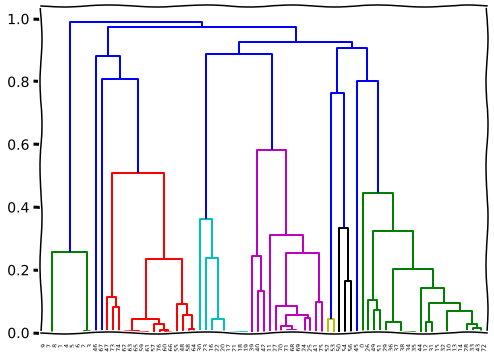

In [0]:
clusters = clustering(S,plot = True, max_clust = 8)

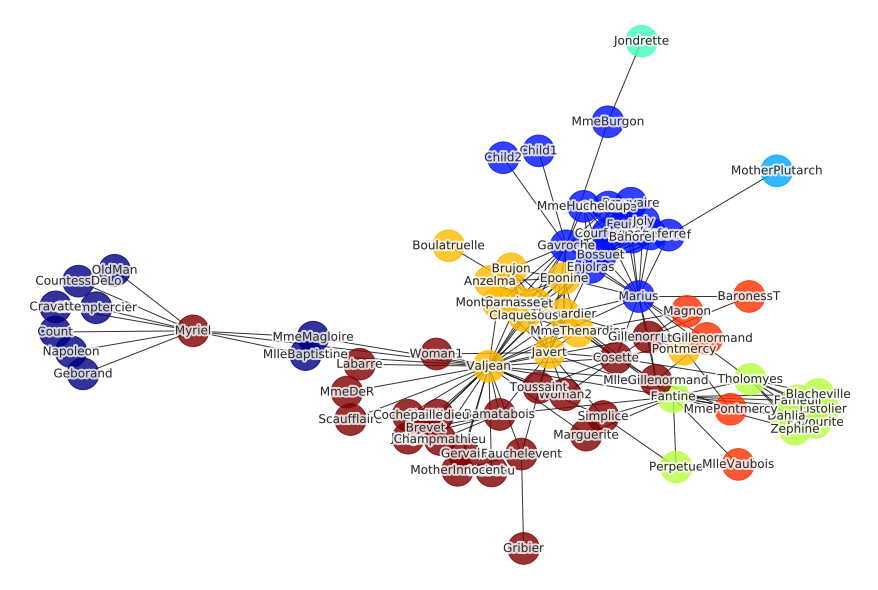

In [0]:
figsize(12,8)
pos = nx.spring_layout(G)
nx.draw(G,node_color = clusters,with_labels = True,node_size = 1000,alpha = .8,pos = pos,cmap = plt.get_cmap('jet'))
plt.show()

### Mixings

**Assortative mixing: like links with like**    
**Disassortative mixing*: like links with dislike**

Vetex can mix on any type of attributes

In [0]:
nx.degree_assortativity_coefficient(G)

-0.16522513442236916